In [26]:
import urbs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [4]:
years = [2020, 2025]

In [6]:
df = {}
for year in years:
    df[year] = urbs.load(f"myopic/output/output_bayern_{year}.h5")._result

In [8]:
df[2020].keys()

dict_keys(['cap_pro', 'cap_pro_new', 'cap_sto_c', 'cap_sto_c_new', 'cap_sto_p', 'cap_sto_p_new', 'com', 'com_buy', 'com_demand', 'com_env', 'com_sell', 'com_stock', 'com_supim', 'com_tuples', 'com_type', 'cost_type', 'costs', 'def_costs', 'def_initial_storage_state', 'def_intermittent_supply', 'def_partial_process_input', 'def_partial_process_output', 'def_process_input', 'def_process_output', 'def_storage_energy_power_ratio', 'def_storage_state', 'dt', 'e_co_buy', 'e_co_sell', 'e_co_stock', 'e_pro_in', 'e_pro_out', 'e_sto_con', 'e_sto_in', 'e_sto_out', 'obj', 'pro', 'pro_area_tuples', 'pro_input_tuples', 'pro_maxgrad_tuples', 'pro_output_tuples', 'pro_partial_input_tuples', 'pro_partial_output_tuples', 'pro_partial_tuples', 'pro_timevar_output_tuples', 'pro_tuples', 'res_area', 'res_buy_step', 'res_buy_total', 'res_env_step', 'res_env_total', 'res_global_co2_limit', 'res_process_capacity', 'res_process_maxgrad_lower', 'res_process_maxgrad_upper', 'res_process_throughput_by_capacity', 

In [101]:
year = 2025

gen = (df[year]['e_pro_out']
        .unstack()['Elec']
        .dropna()
        .unstack()
        .reorder_levels(['stf', 'sit', 't'])
        .set_index(pd.date_range(start = f"1/1/{year}", end = f"31/12/{year}", periods = 8760))
        )

#gen.head()

In [102]:
con = (df[year]['e_pro_in']
        .unstack()['Elec']
        .dropna()
        .unstack()
        .reorder_levels(['stf', 'sit', 't'])
        .set_index(pd.date_range(start = f"1/1/{year}", end = f"31/12/{year}", periods = 8760))
        )

#con.head()

Text(0.5, 1.0, 'Monthly electricity consumption in TWh (2025)')

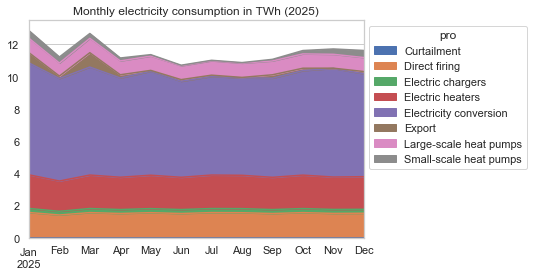

In [103]:
ax = (con / 1e6).resample('M').sum().plot(kind = 'area')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title(f'Monthly electricity consumption in TWh ({year})')

Text(0.5, 1.0, 'Monthly electricity generation in TWh (2025)')

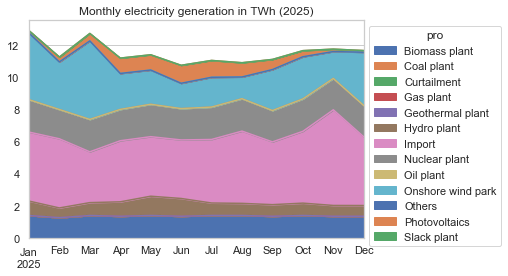

In [108]:
ax = (gen / 1e6).resample('M').sum().plot(kind = 'area')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title(f'Monthly electricity generation in TWh ({year})')